# Homework 3 - DreamBooth
In this homework you will implement DreamBooth - a method of finetuning diffusion models.

Since scoring image generation is costly, the effectiveness of your model will be scored based on the quality of images in the reports you deliver. Please note
that you will be scored based on the report and the code so be sure to put work into both parts (that is, if the images for a task and your conclusions are not in the report you will get 0 points for the task). The report should be created using the latex template and be delivered as PDF.

You will run the finetuning using the dataset with dogs, which is delivered as a tar.gz archive. It contains 5 dog images of a specific breed.

You can get 10 points in total for solving the homework, the points will be split as follows:
*   Using Hugging Face [1pt]
*   Generate Images from Stable Diffusion [1pt]
*   Train DreamBooth [4pt]
*   Prior Preservation [1pt]
*   Mixing Models in Denoising [1pt]
*   Report Quality [2pt] (this will be multiplied by the sum of scores from other tasks and divided by 8)



## Prerequisites
Before starting to solve this homework, you should read the following texts:
*   Paper introducing diffusion models to image generation: https://arxiv.org/pdf/2006.11239, most importantly section 2 and algorithms 1 and 2
*   Subsection "Departure to Latent Space" from section1 and section 3 of https://arxiv.org/pdf/2112.10752
*   DreamBooth paper https://arxiv.org/pdf/2208.12242



In [1]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
import torch
import os

from PIL import Image
from diffusers import DiffusionPipeline, DDPMScheduler, DDIMScheduler,UNet2DModel
import random
import string


## Using Hugging Face [1pt]
Hugging Face is a company developing tools for convenient use of machine learning models. In this homework, we will be using their library diffusers, which has been created specifically for working with diffusion models.

Below there is an example code for image generation from a simple unconditional model.

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

An error occurred while trying to fetch google/ddpm-ema-church-256: google/ddpm-ema-church-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

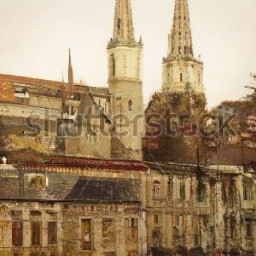

In [3]:
# Initialize the schedulers
scheduler_ddpm = DDPMScheduler.from_pretrained("google/ddpm-ema-church-256")
scheduler_ddim = DDIMScheduler.from_pretrained("google/ddpm-ema-church-256")

# Initialize the model from a pretrained checkpoint
model = UNet2DModel.from_pretrained("google/ddpm-ema-church-256").to("cuda")

# Define a diffusion pipeline
pipeline = DiffusionPipeline.from_pretrained("google/ddpm-ema-church-256", unet=model, scheduler=scheduler_ddim)
pipeline.to("cuda")

# Generate an image using the pipeline
image = pipeline(num_inference_steps=100).images[0]
image

Generate 5 images using the model defined above, try each of the two schedulers defined above. Try different numbers of timesteps (200, 50 and 10) in denoising. The initial noise should be the same each time.
Describe the influence of number of steps on the generated images in both schedulers.
Compare the difference between the two schedulers.
Look at how both schedulers are defined mathematically. 
Give an explanation (we don't expect a formal mathematical proof, just an intuitive understanding based on the formulas) 
for the fact that for DDIM the objects generated for 10 steps are roughly the same as for 200, only with a worse quality, 
while this is not the case for DDPM. Also explain the differences in quality between the schedulers. We expect the answer to be something along the lines of 'this part of the formula \<the part\> is responsible for \<something\> and hence \<something\>'.

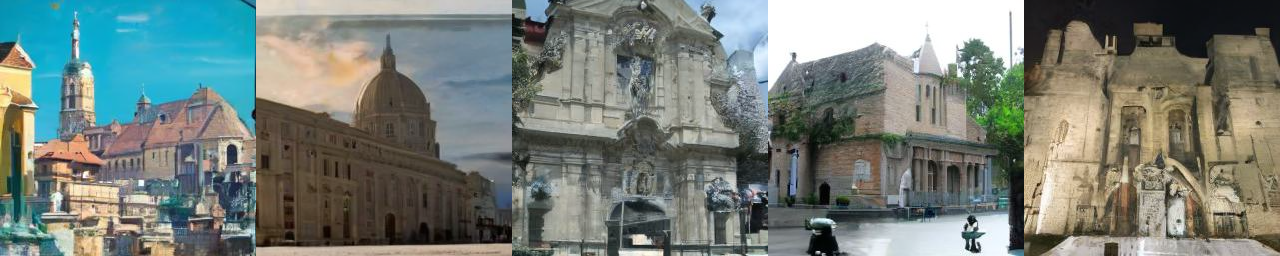

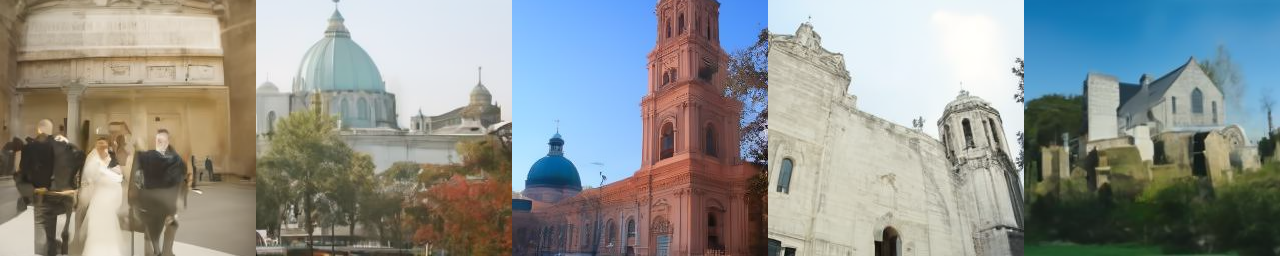

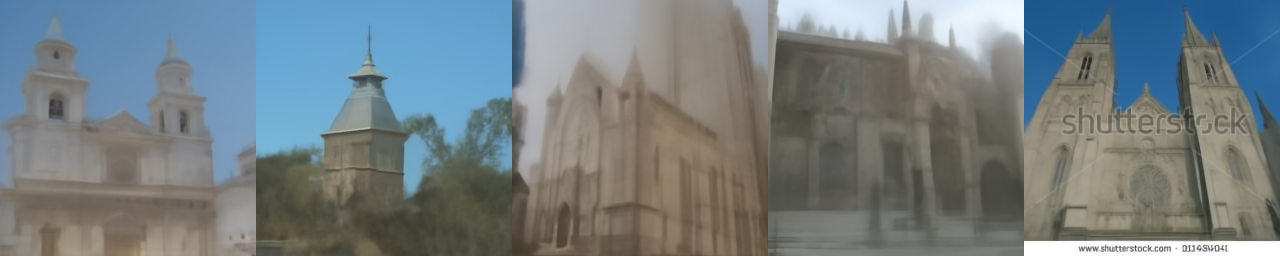

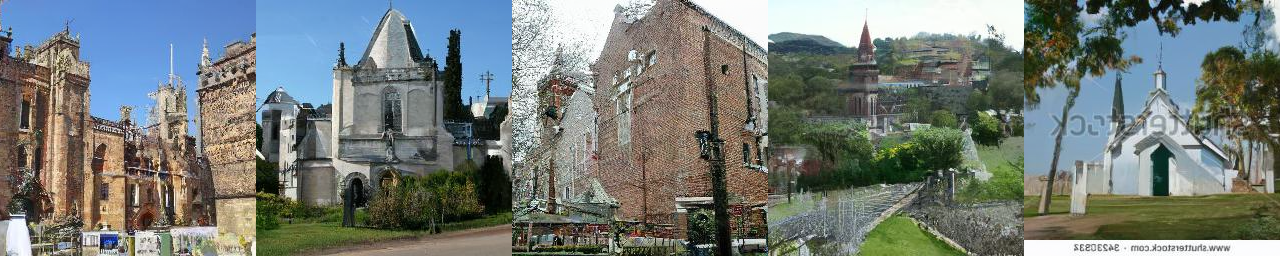

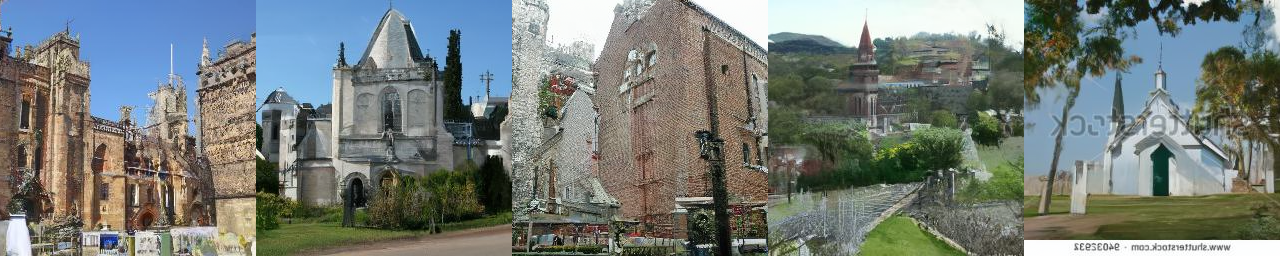

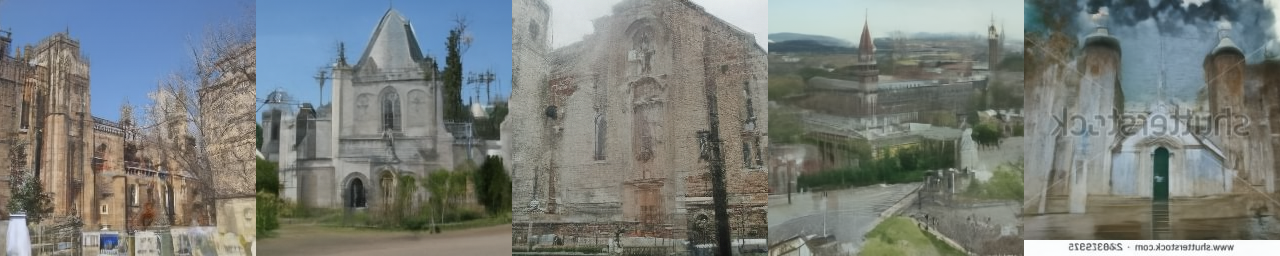

In [ ]:
### CODE START ###

### CODE END ###

## Generate Images from Stable Diffusion [1pt]
Stable diffusion is a group of pretrained latent diffusion model, that is conditioned on text. 
Below, you will have to implement a function for generating images. 
The suggested prompts are specified, but feel free to change them to demonstrate your findings better. 
That is - below you are going to implement dreambooth.

In dream booth you finetune a trained diffusion model, 
to generate specific images. In your case, you will finetune 
it to generate a dog of specific breed, for a prompt "a photo of sks dog", 
"sks" being a token than should not have any meaning before the finetuning.

Ideally, after the finetuning, a prompt "a photo of sks dog" should
result in photos of a dog from this new breed, while a prompt "a photo of a dog",
should result in an image distribution that is the same as before finetuning.
That is unfortunately not the case - all images of dogs will look more like this specific dog breed.

All photos of animals might also change, likely becoming the same color as the specific dog breed.
The further away a concept from a dog, the less this change should be visible - so for instance, 
for the solution we have, images for "a sailboat at sea" are almost the same as before the finetuning, 
while those for "a child playing" are changed, but the change in image diversity is not as drastic as for other animals.

Your solution might differ from ours, so demonstrating one prompt for which the results are virtually unchanged, 
one prompt for which there is some change but can't be trivially detected by human eye and one prompt for which 
the image diversity has been decreased might require use of different prompts than ours.

You shoud generate 3 images for each of 3 different prompts. 
The function should save each image under a unique name. 
The function should be deterministic.

In [ ]:
def generate_images(prompt, num_images, model_path, save_path, device, batch_size):
        ### CODE START ###

        ### CODE END ###


device = 'cuda' if torch.cuda.is_available() else 'cpu'
prompts = ["a sailboat at sea", "a child playing", "a photo of a cat", "a photo of a dog", "a photo of sks dog"]
num_images = 3
sample_batch_size = 3
model_path = "stable-diffusion-v1-5/stable-diffusion-v1-5"
save_path = "/content/example_images"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

for prompt in prompts:
  generate_images(prompt, num_images, model_path, save_path, device, sample_batch_size)

## Dataset components
There are no points for this part, but feel free to edit them as needed.
Please note that arguments `class_data_root`, `class_prompt`, `class_num` of `DreamBoothDataset`
will only be used in the point with incresing the diversity.

In [ ]:
import gc
import math
import os
from pathlib import Path
import bitsandbytes as bnb
from transformers import AutoTokenizer
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
from PIL import Image
from PIL.ImageOps import exif_transpose
from torch.utils.data import Dataset
from torchvision import transforms
from tqdm.auto import tqdm
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    DiffusionPipeline,
    UNet2DConditionModel,
)

from transformers import CLIPTextModel


class DreamBoothDataset(Dataset):
    def __init__(
        self,
        instance_data_root,
        instance_prompt,
        tokenizer,
        class_data_root=None,
        class_prompt=None,
        class_num=None,
        size=512,
        tokenizer_max_length=None,
    ):
        self.size = size
        self.tokenizer = tokenizer
        self.tokenizer_max_length = tokenizer_max_length

        self.instance_data_root = Path(instance_data_root)
        if not self.instance_data_root.exists():
            raise ValueError(f"Instance {self.instance_data_root} images root doesn't exists.")

        self.instance_images_path = list(Path(instance_data_root).iterdir())
        self.num_instance_images = len(self.instance_images_path)
        self.instance_prompt = instance_prompt
        self._length = self.num_instance_images
        self.class_data_root = None
        if class_data_root is not None:
            self.class_data_root = Path(class_data_root)
            print(self.class_data_root)
            self.class_images_path = list(self.class_data_root.iterdir())
            print(self.class_images_path)
            self.num_class_images = min(len(self.class_images_path), class_num)
            self._length = max(self.num_class_images, self.num_instance_images)
            self.class_prompt = class_prompt


        self.image_transforms = transforms.Compose(
            [
                transforms.Resize(size, interpolation=transforms.InterpolationMode.BILINEAR),
                transforms.RandomCrop(size),
                transforms.ToTensor(),
                transforms.Normalize([0.5], [0.5]),
            ]
        )

    def __len__(self):
        return self._length

    def __getitem__(self, index):
        example = {}
        instance_image = Image.open(self.instance_images_path[index % self.num_instance_images])
        instance_image = exif_transpose(instance_image)

        example["instance_images"] = self.image_transforms(instance_image)

        text_inputs = self.tokenizer(self.instance_prompt,
                                     truncation=True,
                                     padding="max_length",
                                     max_length=self.tokenizer_max_length,
                                     return_tensors='pt')
        example["instance_prompt_ids"] = text_inputs.input_ids
        example["instance_attention_mask"] = text_inputs.attention_mask

        if self.class_data_root:
            class_image = Image.open(self.class_images_path[index % self.num_class_images])
            class_image = exif_transpose(class_image)
            example["class_images"] = self.image_transforms(class_image)

            class_text_inputs = self.tokenizer(self.class_prompt,
                                     truncation=True,
                                     padding="max_length",
                                     max_length=self.tokenizer_max_length,
                                     return_tensors='pt')

            example["class_prompt_ids"] = class_text_inputs.input_ids
            example["class_attention_mask"] = class_text_inputs.attention_mask

        return example


Parameter `with_prior_preservation` should only be set to True in the increasing the diversity section.

In [ ]:
def collate_fn(examples, with_prior_preservation=False):
    input_ids = [example["instance_prompt_ids"] for example in examples]
    pixel_values = [example["instance_images"] for example in examples]

    attention_mask = [example["instance_attention_mask"] for example in examples]

    if with_prior_preservation:
        input_ids += [example["class_prompt_ids"] for example in examples]
        pixel_values += [example["class_images"] for example in examples]

    pixel_values = torch.stack(pixel_values)
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()

    input_ids = torch.cat(input_ids, dim=0)

    batch = {
        "input_ids": input_ids,
        "pixel_values": pixel_values,
    }

    attention_mask = torch.cat(attention_mask, dim=0)
    batch["attention_mask"] = attention_mask
    print(batch['attention_mask'])

    return batch


## Implement training and finetune the model [4pt]
You should:
*       Only train the unet component
*       Use gradient checkpointing
*       Use 8-bit optimizers, such as `bnb.optim.AdamW8bit`

Your code should run on a T4 GPU on Colab.

In [ ]:
def get_components(path, device):
    # Load the model components
    # from the provided path
    # Choose the components for training
    # Be sure to move them to the correct device
    ### CODE START ###

    ### CODE END ###
    return noise_scheduler, text_encoder, vae, unet

Implement the diffusion model objective for finetuning.

In [ ]:
def train(output_dir,
                  model_path,
                  noise_scheduler,
                  text_encoder,
                  vae,
                  unet,
                  optimizer,
                  dataloader,
                  train_steps,
                  prior_preservation
                  ):

    ### CODE START ###

    for _ in range(num_train_epochs):

        for step, batch in enumerate(dataloader):
            # Map the pixel values into the latent space by using the Variational Autoencoder

            # The encoded inputs need to be scaled using the scaling factor (which is 0.18215 for the VAE)

            # Sample random gaussian noise of the same shape as the model input

            # Sample random timesteps for each image in batch

            # Use the scheduler to add the correct amount of noise to the model input

            # Encode the text prompts using the text encoder


            # Use the unet to predict the noise (so your network should be able to predict the noise that can be substracted from the noisy image)

            # Calculate the loss


            # Update the model


    #  Save the newly trained pipeline


    # Clear the gpu memory


    ### CODE END ###

Run the training and perform the evaluation. You can use the suggested hyperparameters, but you can also change them if that would make your model better.
Evaluating generative models is difficult and calculating the metrics generally requires generating thousands of images, therefore
your homework will be graded based on the visual results. In this low-GPU memory setup, the expected result is a model, that will
generate photos of a dog closely resembling the training data, while allowing for some additions - like generating the dog on a skate
board etc. 

In [ ]:
model_path = "stable-diffusion-v1-5/stable-diffusion-v1-5"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
learning_rate = 5e-6
instance_data_dir = '/content/dog'
instance_prompt = "a photo of sks dog"
resolution = 512
batch_size = 1
output_dir = '/content/trained_model'
train_steps = 400


### CODE START ###

### CODE END ###

## Increasing image diversity [2pt]
Looking at the images you generated using your finetuned model and comparing them with ones from the original model, you can likely notice the issues with the diversity of generated images, especially animal images.
Your task will be to consider two approaches that might allow for improving that.

### Prior preservation [1pt]
This is a classical method for counteracting forgetting during finetuning, and this is described in the DreamBooth paper. In addition to instance prompt "A photo of sks dog", a class prompt "A photo of a dog" is defined. You should generate 50 images for the class prompt from the original pretrained model. Then, during the finetuning phase, your model at each gradient update should receive a gradient from one image from the original class, as well as one instance image.

### Mixing models in generation [1pt]
During denoising, you can perform certain steps of the denoising using the finetuned model and other using the original one. Try to either perform a suffix or a prefix of steps with the original model, report any interesting findings in the report. Report which scheduler are you using as well as the number of steps. We want a configuration, that for a prompt "A photo of sks dog" works similarily to the finetuned model and for a prompt "A photo of a dog" works similarily to the original model. Such a configuration does not exist, but some interesting questions are:
- How using the original model at a prefix differs from using it at the suffix
- What is the best configuration you find
- Denote the original model by $O$ and finetuned by $F$, assume you denoise for $k$ steps, let $N$ be noise (a random variable from a normal distribution), $P$ be a prompt and $N_m^{k-m}=F^{k-m}O^mN$ be the random variable after $m$ steps of denoising with the original model and $k-m$ with the finetuned one, conditioned on the prompt.  How does the distribution of the random variable $N_m^{k-m}$ change with $m$ for both $P=$'A photo of sks dog' and $P=$'A photo of a dog'? Is the change very 'smooth' and gradual or are there some abrupt changes? Note, that this is not a formal mathematical problem, and you are expected to investigate the distributions by sampling a few images for the same noise for different values of $m$ and looking at them. (the same goes for when we use the original model for a prefix)

In [ ]:
### CODE START ###

### CODE END ###